## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
#%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="left", on = "Mouse ID")

# Preview merged data
merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice in the DataFrame.
mice_count = merged_data['Mouse ID'].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = merged_data[merged_data.duplicated(['Mouse ID'], keep=False)]
duplicateMice.set_index("Mouse ID",inplace=True)
print(duplicateMice)

         Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                         
k403         Ramicane  Male          21          16          0   
k403         Ramicane  Male          21          16          5   
k403         Ramicane  Male          21          16         10   
k403         Ramicane  Male          21          16         15   
k403         Ramicane  Male          21          16         20   
...               ...   ...         ...         ...        ...   
z969         Naftisol  Male           9          30         25   
z969         Naftisol  Male           9          30         30   
z969         Naftisol  Male           9          30         35   
z969         Naftisol  Male           9          30         40   
z969         Naftisol  Male           9          30         45   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
k403               45.000000               

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_id = duplicateMice.loc['g989', :]
dupl_id

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Mouse ID g989 duplicate entry. Drop ID
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = duplicateMice.drop("g989")
cleaned_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Reset index
dataset = cleaned_data.reset_index()

In [7]:
# Checking the number of mice in the clean DataFrame.
new_count = dataset["Mouse ID"].nunique()
new_count

236

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_data = dataset.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].describe()
tumor_data
# This method produces everything in a single groupby function.

count       mean       std        min        25%  \
Drug Regimen Timepoint                                                     
Capomulin    0           25.0  45.000000  0.000000  45.000000  45.000000   
             5           25.0  44.266086  2.242964  38.796474  43.180977   
             10          25.0  43.084291  3.513422  35.624403  39.952347   
             15          24.0  42.064317  4.108369  32.623003  39.713398   
             20          23.0  40.716325  4.362915  30.485985  38.240746   
...                       ...        ...       ...        ...        ...   
Zoniferol    25          16.0  55.432935  2.410052  50.970689  54.469040   
             30          15.0  57.713531  3.098552  52.747718  56.413780   
             35          14.0  60.089372  3.297993  54.810813  57.871585   
             40          14.0  62.916692  3.736102  56.994816  60.991445   
             45          14.0  65.960888  3.755037  60.752704  62.618149   

                              50%        75%        max  
Drug Regimen Timepoint                                   
Capomulin    0          45.000000  45.000000  45.000000  
             5          45.597064  45.760886  45.895647  
             10         43.421014  46.408361  46.759074  
             15         42.798160  44.634897  47.488599  
             20         40.716428  43.596783  48.158209  
...                           ...        ...        ...  
Zoniferol    25         55.676604  56.819402  60.253481  
             30         57.419744  58.710803  65.893986  
             35         60.365832  61.946127  66.742924  
             40         62.274543  64.524073  71.108118  
             45         65.684689  68.341763  73.324432  

[100 rows x 8 columns]

In [9]:
tumor_data_median = dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_data_median = round(tumor_data_median, 2)
tumor_data_median

Drug Regimen
Capomulin    41.56
Ceftamin     51.91
Infubinol    51.82
Ketapril     53.74
Naftisol     52.54
Placebo      52.32
Propriva     50.71
Ramicane     40.67
Stelasyn     52.49
Zoniferol    51.83
Name: Tumor Volume (mm3), dtype: float64

In [10]:
tumor_data_mean = dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_data_mean = round(tumor_data_mean, 2)
tumor_data_mean

Drug Regimen
Capomulin    40.68
Ceftamin     52.77
Infubinol    52.88
Ketapril     55.35
Naftisol     54.43
Placebo      54.08
Propriva     52.37
Ramicane     40.22
Stelasyn     54.28
Zoniferol    53.28
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_data_variance = dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_data_variance = round(tumor_data_variance, 2)
tumor_data_variance

Drug Regimen
Capomulin    24.95
Ceftamin     38.84
Infubinol    43.13
Ketapril     68.15
Naftisol     65.93
Placebo      61.05
Propriva     43.78
Ramicane     23.49
Stelasyn     59.30
Zoniferol    48.42
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_data_stdev = dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_data_stdev = round(tumor_data_stdev, 2)
tumor_data_stdev

Drug Regimen
Capomulin    4.99
Ceftamin     6.23
Infubinol    6.57
Ketapril     8.26
Naftisol     8.12
Placebo      7.81
Propriva     6.62
Ramicane     4.85
Stelasyn     7.70
Zoniferol    6.96
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumor_data_sem = dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
tumor_data_sem = round(tumor_data_sem, 2)
tumor_data_sem

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.61
Naftisol     0.60
Placebo      0.58
Propriva     0.55
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tumor_summary = dataset.groupby(['Drug Regimen'])
summary_table = pd.DataFrame({"Volume Mean": tumor_data_mean, "Volume Median": tumor_data_median,
                             "Volume Variance": tumor_data_variance,
                             "Volume Standard Deviation": tumor_data_stdev,
                             "Volume Standard Error of Mean": tumor_data_sem})
summary_table

,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation,Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.77,51.91,38.84,6.23,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.35,53.74,68.15,8.26,0.61
Naftisol,54.43,52.54,65.93,8.12,0.60
Placebo,54.08,52.32,61.05,7.81,0.58
Propriva,52.37,50.71,43.78,6.62,0.55
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.28,52.49,59.30,7.70,0.57


## Bar Plots

In [15]:
# Total mice per drug regimen
micepertimepoint = dataset.groupby(['Drug Regimen'])['Mouse ID'].count()
micepertimepoint
#total_mice = micepertimepoint.nunique()['Timepoint']
#total_mice
#len(total_mice)

Drug Regimen
Capomulin    230
Ceftamin     174
Infubinol    178
Ketapril     186
Naftisol     184
Placebo      180
Propriva     147
Ramicane     228
Stelasyn     180
Zoniferol    181
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


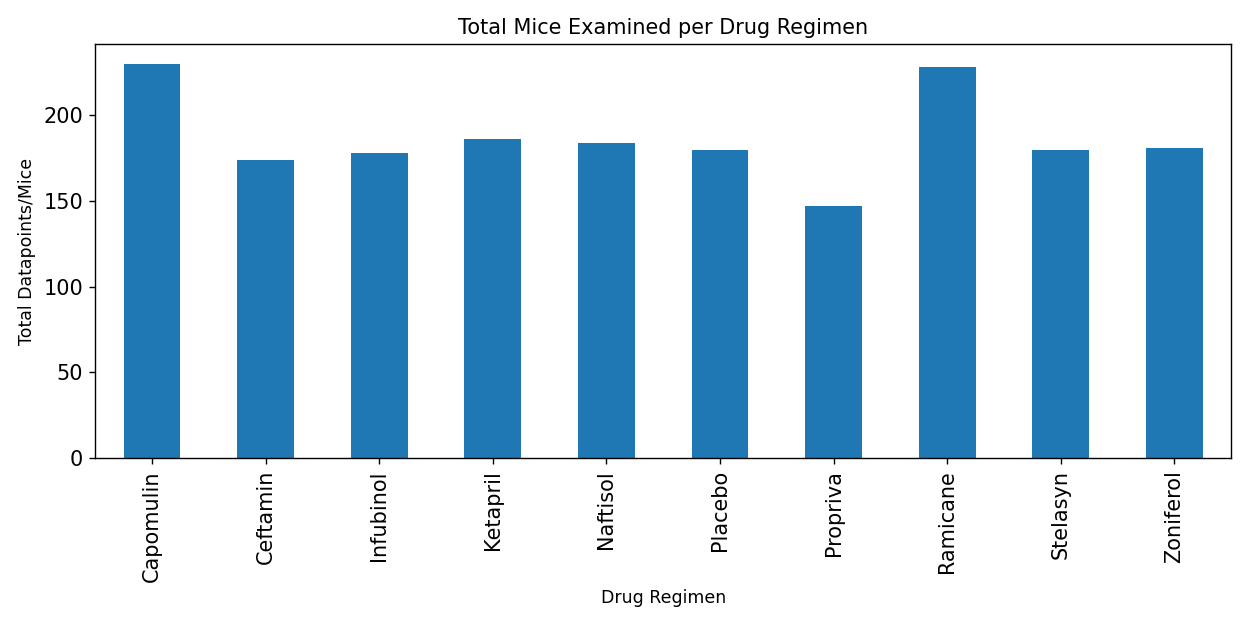

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

treatment_data = dataset.groupby('Drug Regimen')

t_counts = treatment_data['Mouse ID'].count()

treatment_chart = t_counts.plot(kind="bar", title = "Total Mice Examined per Drug Regimen", figsize=(10,5),
                                                     legend=False, fontsize=12)
treatment_chart.set_xlabel("Drug Regimen")
treatment_chart.set_ylabel("Total Datapoints/Mice")

plt.show()
plt.tight_layout()
plt.savefig("TotalMiceperRegimenPyBar.png")


<IPython.core.display.Javascript object>


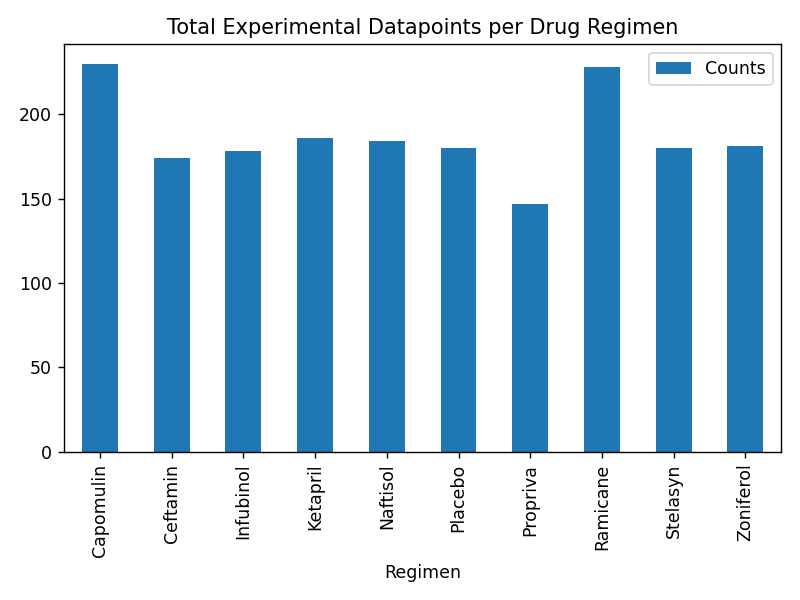

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

tumor_drug = {"Regimen": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                         "Ramicane", "Stelasyn", "Zoniferol"], "Counts": [230, 174, 178, 186, 184, 180, 147, 228, 180, 181]}
treatment_df = pd.DataFrame(tumor_drug)

barplot = treatment_df.plot.bar(x="Regimen", y="Counts", rot=90, title = "Total Experimental Datapoints per Drug Regimen")
barplot.set_ylabel = "Total Datapoints"
plt.show()
plt.tight_layout()
plt.savefig("ExperimentalDatapointsPerRegimenPandasBar.png")

## Pie Plots

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_demo = dataset['Sex'].value_counts()['Male']
female_demo = dataset['Sex'].value_counts()['Female']
total_demo = male_demo + female_demo

m_percent = round((male_demo/total_demo) * 100,1)
f_percent = round((female_demo/total_demo) * 100,1)


genders = ["Male", "Female"]
mice_gender = [male_demo, female_demo]
colors = ["lightskyblue", "lightcoral"]
explode = (0.05, 0)


<IPython.core.display.Javascript object>


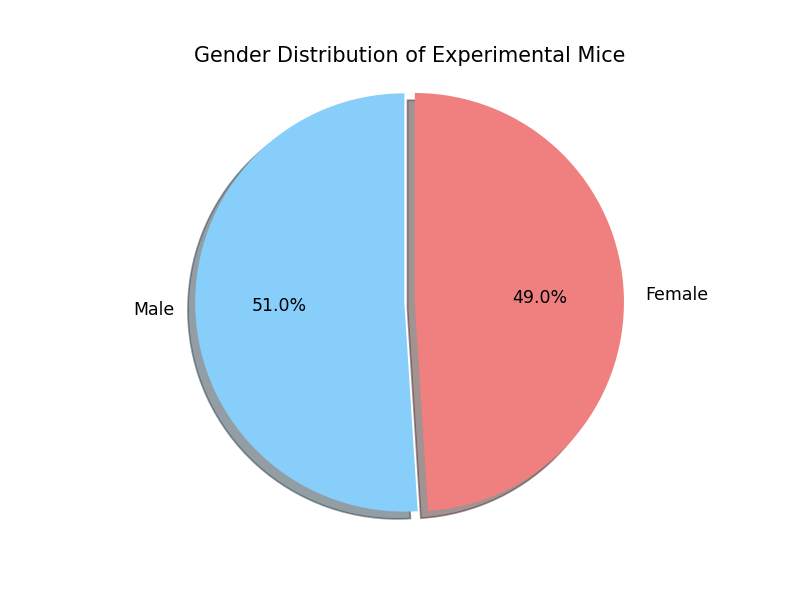

In [19]:
# Pie Chart formatting and rendering

plt.title("Gender Distribution of Experimental Mice")
plt.pie(mice_gender, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()
plt.savefig("GenderDistributionPyChart.png")

<IPython.core.display.Javascript object>


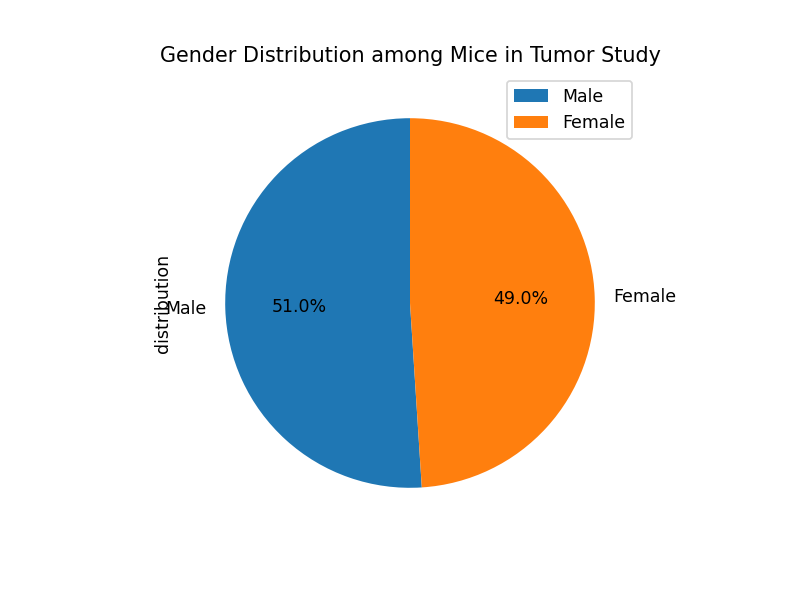

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_dist_df = pd.DataFrame({"distribution": [male_demo, female_demo],
                              "Gender": ["Male", "Female"]})
gender_dist_plot = gender_dist_df.plot.pie(y="distribution", labels=("Male", "Female"),
                                           title="Gender Distribution among Mice in Tumor Study",
                                          autopct='%1.1f%%', startangle=90)
plt.savefig("GenderDistributionPieChartPandas.png")

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin (determined from instructional prompt)

# Drill down data to obtain final Tumor Volume values

tumor_vol = dataset.drop_duplicates("Mouse ID", 'last')
tumor_vol.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [22]:
# keep only the data pertaining to Drug Regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

t_volume = tumor_vol[(tumor_vol['Drug Regimen'] == 'Capomulin') |
                    (tumor_vol['Drug Regimen'] == 'Ramicane') |
                    (tumor_vol['Drug Regimen'] == 'Infubinol') |
                    (tumor_vol['Drug Regimen'] == 'Ceftamin')]
t_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [23]:
vol_descr = t_volume.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()
round(vol_descr, 2)

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,36.67,5.72,23.34,32.38,38.13,40.16,47.69
Ceftamin,21.0,60.18,6.73,46.78,56.06,61.43,64.63,68.92
Infubinol,25.0,58.18,8.60,36.32,54.05,60.17,65.53,72.23
Ramicane,25.0,36.19,5.67,22.05,31.56,36.56,40.66,45.22


In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

lowerq = round(vol_descr['min'], 2)
upperq = round(vol_descr['max'], 2)
medianq = round(vol_descr['50%'], 2)
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {medianq} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of temperatures is: Drug Regimen
Capomulin    23.34
Ceftamin     46.78
Infubinol    36.32
Ramicane     22.05
Name: min, dtype: float64
The upper quartile of temperatures is: Drug Regimen
Capomulin    47.69
Ceftamin     68.92
Infubinol    72.23
Ramicane     45.22
Name: max, dtype: float64
The interquartile range of temperatures is: Drug Regimen
Capomulin    24.35
Ceftamin     22.14
Infubinol    35.91
Ramicane     23.17
dtype: float64
The the median of temperatures is: Drug Regimen
Capomulin    38.13
Ceftamin     61.43
Infubinol    60.17
Ramicane     36.56
Name: 50%, dtype: float64 
Values below Drug Regimen
Capomulin   -13.185
Ceftamin     13.570
Infubinol   -17.545
Ramicane    -12.705
dtype: float64 could be outliers.
Values above Drug Regimen
Capomulin     84.215
Ceftamin     102.130
Infubinol    126.095
Ramicane      79.975
dtype: float64 could be outliers.


In [25]:
tumor_volume = t_volume.pivot_table('Tumor Volume (mm3)', 'Mouse ID', ['Drug Regimen'])
tumor_volume


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,
a203,NaN,NaN,67.973419,NaN
a251,NaN,NaN,65.525743,NaN
a275,NaN,62.999356,NaN,NaN
a411,NaN,NaN,NaN,38.407618
a444,NaN,NaN,NaN,43.047543
...,...,...,...,...
y769,NaN,68.594745,NaN,NaN
y793,31.896238,NaN,NaN,NaN
y865,NaN,64.729837,NaN,NaN


In [26]:
# Clean data for final tumor volumes for Capomulin, Ceftamin, Infubinol, and Ramicane
x1 = tumor_volume['Capomulin'].dropna()
x2 = tumor_volume['Ceftamin'].dropna()
x3 = tumor_volume['Infubinol'].dropna()
x4 = tumor_volume['Ramicane'].dropna()

<IPython.core.display.Javascript object>


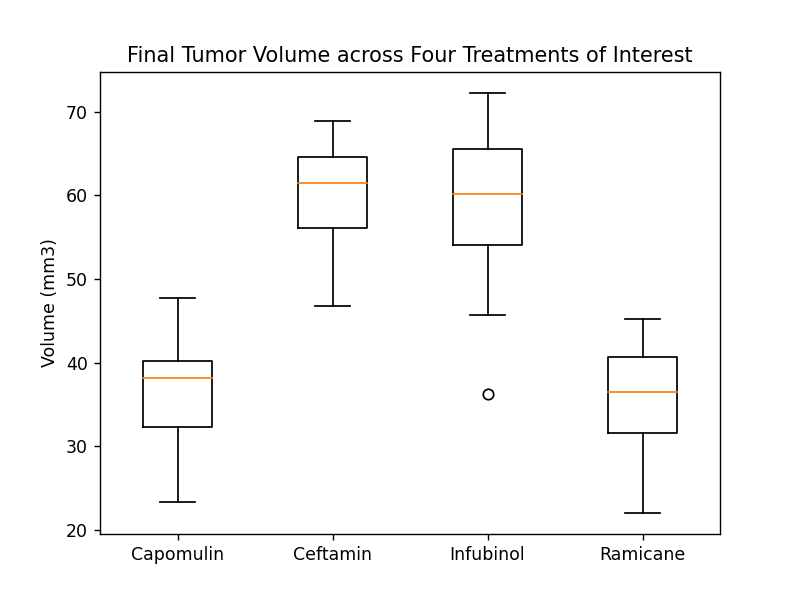

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume across Four Treatments of Interest")
ax1.boxplot([x1, x2, x3, x4])
ax1.set_ylabel('Volume (mm3)')


ax1.set_xticklabels(['Capomulin','Ceftamin','Infubinol','Ramicane'])

#plt.boxplot([x1, x2, x3, x4])
#plt.title("Final Tumor Volume across Four Treatments of Interest")
#plt.set_ylabel("Volume (mm3)")
#plt.xticks([1,2,3,4], ['Capomulin','Ceftamin','Infubinol','Ramicane'])

plt.savefig("FinalTumorVolumeBoxPlot.png")

## Line and Scatter Plots

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Group Mice treated with Capomulin
x1

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Capomulin, dtype: float64

In [30]:
# Mouse ID x401 treated with Capomulin.

x401 = duplicateMice.loc['x401', :]
x401

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
x401,Capomulin,Female,16,15,0,45.000000,0
x401,Capomulin,Female,16,15,5,45.473753,0
x401,Capomulin,Female,16,15,10,39.113891,0
x401,Capomulin,Female,16,15,15,39.776250,0
x401,Capomulin,Female,16,15,20,36.065835,0
x401,Capomulin,Female,16,15,25,36.617120,0
x401,Capomulin,Female,16,15,30,32.915292,0
x401,Capomulin,Female,16,15,35,30.206825,0
x401,Capomulin,Female,16,15,40,28.167397,0


<IPython.core.display.Javascript object>


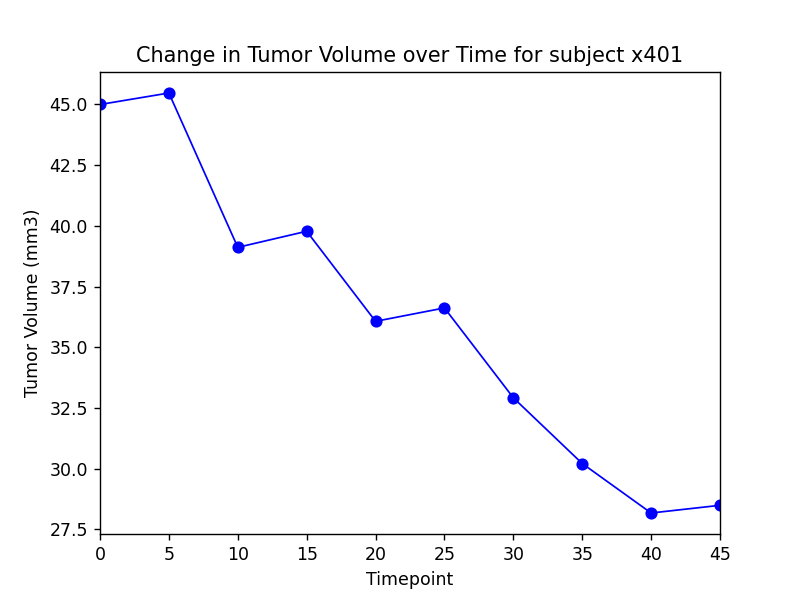

In [31]:
# Line plot: time point vs tumor volume

plt.plot(x401['Timepoint'], x401['Tumor Volume (mm3)'], marker="o", color="b", linewidth=1)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Change in Tumor Volume over Time for subject x401")
plt.xlim(0,45)
plt.savefig("Subjectx401TumorVolumeChange.png")

In [32]:
# Collect Capomulin datapoints for ScatterPlot (weight vs tumor volume)
mean_x401 = x401['Tumor Volume (mm3)'].mean()
r554 = duplicateMice.loc['r554', :]
mean_r554 = r554['Tumor Volume (mm3)'].mean()
v923 = duplicateMice.loc['v923', :]
mean_v923 = v923['Tumor Volume (mm3)'].mean()
l897 = duplicateMice.loc['l897', :]
mean_l897 = l897['Tumor Volume (mm3)'].mean()
b128 = duplicateMice.loc['b128', :]

m957 = duplicateMice.loc['m957', :]
mean_m957 = m957['Tumor Volume (mm3)'].mean()
y793 = duplicateMice.loc['y793', :]
mean_y793 = y793['Tumor Volume (mm3)'].mean()
j119 = duplicateMice.loc['j119', :]
mean_j119 = j119['Tumor Volume (mm3)'].mean()

cap_mice = duplicateMice.loc[['b128','b742','f966','g288','g316','i557','i738','j119','j246','l509',
                             'l897','m601','m957','r157','r554','r944','s185','s710','t565','u364',
                             'v923','w150','w914','x401','y793'], :]
cap_mice


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,0,45.000000,0
b128,Capomulin,Female,9,22,5,45.651331,0
b128,Capomulin,Female,9,22,10,43.270852,0
b128,Capomulin,Female,9,22,15,43.784893,0
b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...
y793,Capomulin,Male,17,17,25,38.992734,2
y793,Capomulin,Male,17,17,30,35.726023,2
y793,Capomulin,Male,17,17,35,36.327870,2


<IPython.core.display.Javascript object>


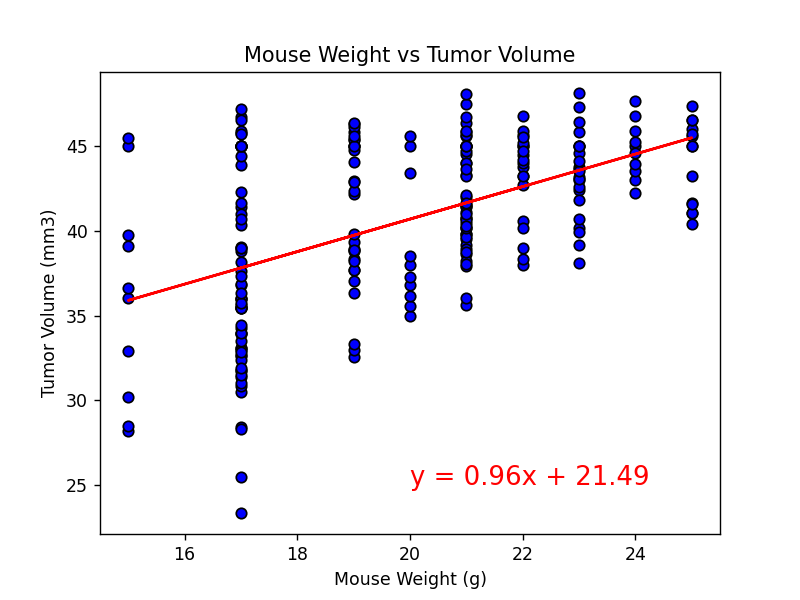

The r-squared is: 0.27636002234559176
The correlation coefficient between weight and tumor volume is 0.53


In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = cap_mice["Weight (g)"]
volume = cap_mice['Tumor Volume (mm3)']

mv_corr = round(st.pearsonr(weight,volume)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, volume, marker="o", facecolors="b", edgecolors="black")
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between weight and tumor volume is {mv_corr}")

plt.savefig("MassTumorVolumeScatterPlot.png")

## Correlation and Regression